# Employee Exit Survey Analysis

In this guided project, we'll work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia.

Through analyzing the data, we'll attempt to answer two questions:

1) Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

2) Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')
tafe_survey = pd.read_csv('tafe_survey.csv')

In [2]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

In [3]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

It's apparent that each of these datasets contain a cumbersome amount of columns, making it difficult to read the results from the `dataframe.info()`. We'll go ahead and drop the redundant columns while keeping the columns that make the biggest impact on employee satisfaction.

In [4]:
#drop cumbersome columns
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49],axis=1).copy()
dete_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

In [5]:
#drop cumbersome columns
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66],axis=1).copy()
tafe_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 23 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Record ID                                                                  702 non-null    float64
 1   Institute                                                                  702 non-null    object 
 2   WorkArea                                                                   702 non-null    object 
 3   CESSATION YEAR                                                             695 non-null    float64
 4   Reason for ceasing employment                                              701 non-null    object 
 5   Contributing Factors. Career Move - Public Sector                          437 non-null    object 
 6   Contributing Factors. Career Move - Private Sector        

Also, it's important to **note that whenever transforming or filtering a dataframe, it's a best practice to copy the result to a new variable**. Otherwise, you could end up with a settingwithcopy error. 

Next, we'll standardize the column names.

In [6]:
#this code strips the whitespace from the column names while replacing spaces between words with underscores
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ','_')

In [7]:
#standardizing the tafe survey
tafe_survey_updated.columns = tafe_survey_updated.columns.str.strip()
tafe_survey_updated = tafe_survey_updated.rename(columns={
    'Record ID': 'id',
    'CESSATION YEAR': 'cease_date',
    'Reason for ceasing employment': 'separationtype',
    'Gender. What is your Gender?': 'gender',
    'CurrentAge. Current Age': 'age',
    'Employment Type. Employment Type': 'employment_status',
    'Classification. Classification': 'position',
    'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
    'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'})

Next, we'll filter each dataframe using a boolean filter and regular expression.

In [8]:
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'].str.contains(r'.*resignation.*',case=False, na=False)].copy()

In [9]:
dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation-Move overseas/interstate,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN


In [10]:
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'].str.contains(r'.*resignation.*',case=False,na=False)].copy()

In [11]:
tafe_resignations.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4


# Exploring Columns

Now that we've standardized the column names and trimmed the unnecessary columns, let's go ahead and explore the frequency counts of the values within each column. To do this, we'll utilize the `Series.value_counts()` function from the Pandas library.

It's very helpful to use `Series.value_counts()` because it allows you to quickly familiarize yourself with the data contained in each column, which is helpful for the data cleaning process.

In [12]:
dete_resignations['cease_date'].value_counts()

cease_date
2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2012      1
2010         1
09/2010      1
07/2006      1
Name: count, dtype: int64

In [13]:
# Extract the years and convert them to a float type
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1]
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype("float")

# Check the values again and look for outliers
dete_resignations['cease_date'].value_counts()

cease_date
2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: count, dtype: int64

In [14]:
# Check the unique values and look for outliers
dete_resignations['dete_start_date'].value_counts()

dete_start_date
2011.0    24
2008.0    22
2012.0    21
2007.0    21
2010.0    17
2005.0    15
2004.0    14
2006.0    13
2009.0    13
2013.0    10
2000.0     9
1999.0     8
1994.0     6
2003.0     6
1992.0     6
1996.0     6
1998.0     6
2002.0     6
1990.0     5
1997.0     5
1980.0     5
1993.0     5
1989.0     4
1991.0     4
1988.0     4
1995.0     4
1986.0     3
2001.0     3
1985.0     3
1983.0     2
1976.0     2
1974.0     2
1975.0     1
1984.0     1
1971.0     1
1982.0     1
1972.0     1
1963.0     1
1977.0     1
1973.0     1
1987.0     1
Name: count, dtype: int64

# Create a New Column

Since our end goal is to answer the question below, we need a column containing the length of time an employee spent in their workplace, or years of service, in both dataframes.

* End goal: Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

The `tafe_resignations` dataframe already contains a "service" column, which we renamed to `institute_service`.

Below, we calculate the years of service in the `dete_survey_updated` dataframe by subtracting the `dete_start_date` from the `cease_date` and create a new column named `institute_service`.

In [15]:
dete_resignations['institute_service'] = 0
dete_resignations['institute_service'] = (dete_resignations['cease_date'] - dete_resignations['dete_start_date']).copy()

In [16]:
dete_resignations['institute_service'].head()

3      7.0
5     18.0
8      3.0
9     15.0
11     3.0
Name: institute_service, dtype: float64

# Identify Dissatisfied Employees

Next, we'll identify any employees who resigned because they were dissatisfied. Below are the columns we'll use to categorize employees as "dissatisfied" from each dataframe:

1. `tafe_survey_updated`:
    * `Contributing Factors. Dissatisfaction`
    * `Contributing Factors. Job Dissatisfaction`
<br><br>    
2. `dete_survey_updated`:
    * `job_dissatisfaction`
    * `dissatisfaction_with_the_department`
    * `physical_work_environment`
    * `lack_of_recognition`
    * `lack_of_job_security`
    * `work_location`
    * `employment_conditions`
    * `work_life_balance`
    * `workload`

If the employee indicated any of the factors above caused them to resign, we'll mark them as `dissatisfied` in a new column. After our changes, the new `dissatisfied` column will contain just the following values:

`True`: indicates a person resigned because they were dissatisfied in some way
`False`: indicates a person resigned because of a reason other than dissatisfaction with the job
`NaN`: indicates the value is missing

In [17]:
# Check the unique values
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False)

Contributing Factors. Dissatisfaction
-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: count, dtype: int64

In [18]:
# Check the unique values
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False)

Contributing Factors. Job Dissatisfaction
-                      270
Job Dissatisfaction     62
NaN                      8
Name: count, dtype: int64

In [19]:
# Update the values in the contributing factors columns to be either True, False, or NaN
def update_vals(x):
    if x == '-':
        return False
    elif pd.isnull(x):
        return np.nan
    else:
        return True

In the code below, we *will not* use `dataframe.applymap().any()` to apply our function to the entire dataframe, since **.any() will return NaN values as True, and we don't want NaN values getting mixed up with True values.**

In [20]:
tafe_resignations['dissatisfied'] = tafe_resignations['Contributing Factors. Dissatisfaction'].apply(update_vals)
tafe_resignations['dissatisfied'] = tafe_resignations['Contributing Factors. Job Dissatisfaction'].apply(update_vals)

tafe_resignations_up = tafe_resignations.copy()

# Check the unique values after the updates
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)

dissatisfied
False    270
True      62
NaN        8
Name: count, dtype: int64

In [21]:
dete_factors = ['job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance',
       'workload']

for c in dete_factors:
    print(dete_resignations[c].value_counts())

job_dissatisfaction
False    270
True      41
Name: count, dtype: int64
dissatisfaction_with_the_department
False    282
True      29
Name: count, dtype: int64
physical_work_environment
False    305
True       6
Name: count, dtype: int64
lack_of_recognition
False    278
True      33
Name: count, dtype: int64
lack_of_job_security
False    297
True      14
Name: count, dtype: int64
work_location
False    293
True      18
Name: count, dtype: int64
employment_conditions
False    288
True      23
Name: count, dtype: int64
work_life_balance
False    243
True      68
Name: count, dtype: int64
workload
False    284
True      27
Name: count, dtype: int64


The dete factor columns are already clean and properly formatted. So we don't need to apply our cleaning function. We'll just use `dataframe.any()` to return whether any element is True, potentially over an axis.

`Dataframe.any()` returns False unless there is at least one element within a series or along a Dataframe axis that is True or equivalent (e.g. non-zero or non-empty).

In [22]:
dete_resignations['dissatisfied'] = dete_resignations[dete_factors].any(axis=1, skipna=False)
dete_resignations_up = dete_resignations.copy()
dete_resignations_up['dissatisfied'].value_counts(dropna=False)

dissatisfied
False    162
True     149
Name: count, dtype: int64

# Combining The Data

Below, we'll add an institute column so that we can differentiate the data from each survey after we combine them. Then, we'll combine the dataframes and drop any remaining columns we don't need.

In [23]:
# Add an institute column

dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [24]:
# combine the dataframes

combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)

In [25]:
#Verify the number of non null values in each column

combined.notnull().sum().sort_values()

torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           32
classification                                         161
region                                                 265
role_start_date                                        271
dete_start_date                                        283
role_service                                           290
none_of_the_above                                      311
work_life_balance                                      311
traumatic_incident                                     311
ill_health                                             311
study/travel                                           311
relocation                                             3

In [26]:
#drop columns with less than non null 500 values

combined_updated = combined.dropna(thresh=500, axis=1).copy()

# Clean the Service Column

Next, we'll clean the institute_service column and categorize employees according to the following definitions:

* New: Less than 3 years in the workplace
* Experienced: 3-6 years in the workplace
* Established: 7-10 years in the workplace
* Veteran: 11 or more years in the workplace

Our analysis is based on this article, which makes the argument that understanding employee's needs according to career stage instead of age is more effective.

In [27]:
# check the unique values

combined_updated['institute_service'].value_counts(dropna=False)

institute_service
NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
15.0                   7
20.0                   7
10.0                   6
14.0                   6
12.0                   6
17.0                   6
22.0                   6
18.0                   5
16.0                   5
11.0                   4
23.0                   4
24.0                   4
32.0                   3
39.0                   3
19.0                   3
21.0                   3
36.0                   2
25.0                   2
30.0                   2
26.0                   2
28.0   

In the code below, we are going to convert the `institute_service` column to the string datatype by using the `Series.astype()` method. Then, we'll chain the `Series.str.extract()` method to our code, passing the regular expression `r'(\d+)'` as an argument.

Because the regular expression may look very cryptic, we'll break down exactly what each part of the regular expression means.

`r'(\d+)'`

* `r`: This is a prefix that indicates a raw string in Python. It tells the interpreter to treat backslashes as literal characters and not as escape characters.

* `(\d+)`: This is the actual regular expression:

    * `\d`: This is a special escape sequence that matches any digit (0-9).    
 
    * `+`: This quantifier means "one or more" of the preceding element. So `\d+` matches one or more digits.    
       
    * `()`: The parentheses create a capture group, which means that the first part of the string matched by `\d+` will be captured.

In [28]:
combined_updated['service_category'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)')

In [29]:
# to give you a quick idea of how the regular expression works on a small Series
strings = ['11-20','11-20','7-10','More than 20 years']
series = pd.Series(strings)
series = series.str.extract(r'(\d+)')
series

,0
0,11
1,11
2,7
3,20


In [30]:
#now lets inspect the new column
print('years of service, taken from column:', combined_updated['service_category'].value_counts())

years of service, taken from column: service_category
1     159
3      83
5      56
7      34
11     30
0      20
20     17
6      17
4      16
9      14
2      14
13      8
8       8
15      7
17      6
10      6
22      6
14      6
12      6
18      5
16      5
24      4
23      4
21      3
19      3
39      3
32      3
25      2
28      2
26      2
36      2
30      2
34      1
27      1
29      1
42      1
33      1
41      1
35      1
49      1
38      1
31      1
Name: count, dtype: int64


In [31]:
# convert years of service to categories

def transform_service(x):
    if x >= 11:
        return 'Veteran'
    elif 7 <= x <= 11:
        return 'Established'
    elif 3 <= x <= 7:
        return "Experienced"
    elif pd.isnull(x):
        return np.nan
    else:
        return 'New'

In [32]:
combined_updated['service_category'] = pd.to_numeric(combined_updated['service_category'], errors='coerce')
combined_updated['service_category'] = combined_updated['service_category'].apply(transform_service)
combined_updated['service_category'].value_counts()

service_category
New            193
Experienced    172
Veteran        136
Established     62
Name: count, dtype: int64

In [33]:
combined_updated

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute,service_category
0,4.000000e+00,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,36-40,7.0,False,DETE,Established
1,6.000000e+00,Resignation-Other reasons,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18.0,True,DETE,Veteran
2,9.000000e+00,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,31-35,3.0,False,DETE,Experienced
3,1.000000e+01,Resignation-Other employer,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,15.0,True,DETE,Veteran
4,1.200000e+01,Resignation-Move overseas/interstate,2012.0,Teacher,Permanent Full-time,Male,31-35,3.0,False,DETE,Experienced
...,...,...,...,...,...,...,...,...,...,...,...
646,6.350660e+17,Resignation,2013.0,Operational (OO),Temporary Full-time,Male,21 25,5-6,False,TAFE,Experienced
647,6.350668e+17,Resignation,2013.0,Teacher (including LVT),Temporary Full-time,Male,51-55,1-2,False,TAFE,New
648,6.350677e+17,Resignation,2013.0,NaN,NaN,NaN,NaN,NaN,False,TAFE,NaN
649,6.350704e+17,Resignation,2013.0,Teacher (including LVT),Permanent Full-time,Female,51-55,5-6,False,TAFE,Experienced


# Perform Some Initial Analysis

Finally, we'll replace the missing values in the dissatisfied column with the most frequent value, False. Then, we'll calculate the percentage of employees who resigned due to dissatisfaction in each service_cat group and plot the results.

Note that since we still have additional missing values left to deal with, this is meant to be an initial introduction to the analysis, not the final analysis.

In [34]:
# Verify the unique values
combined_updated['dissatisfied'].value_counts(dropna=False)

dissatisfied
False    432
True     211
NaN        8
Name: count, dtype: int64

In [35]:
# Replace missing values with the most frequent value, False
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

In [36]:
# Calculate the percentage of employees who resigned due to dissatisfaction in each category
combined_updated.pivot_table(index='service_category', values='dissatisfied')

,dissatisfied
service_category,
Established,0.500000
Experienced,0.296512
New,0.248705
Veteran,0.455882


In [37]:
service_category_dissatisfied = combined_updated.pivot_table(index='service_category', values='dissatisfied')

<Axes: xlabel='service_category'>

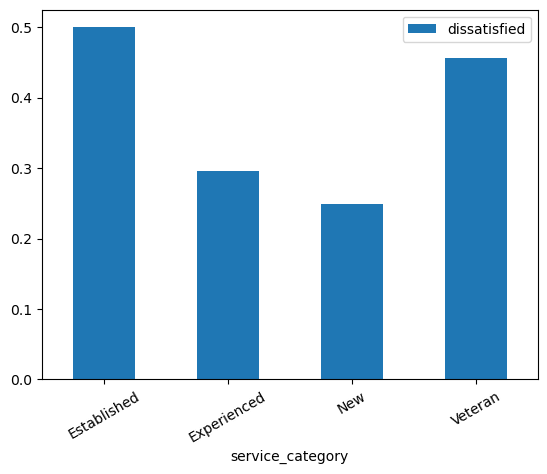

In [38]:
#plot the results

%matplotlib inline

service_category_dissatisfied.plot(kind='bar', rot=30)

# Findings

From our analysis above, we can tentatively conclude that employees with 7 or more years of service are more likely to resign due to some kind of dissatisfaction with the job than employees with less than 7 years of service.

# Next Analysis

For the next analysis, we'll clean and visualize the age group column to see how many people resigned due to dissatisfaction within each age group.

We'll first clean the age column, and then create a function that categorizes each integer in the series by age group.

**Age Groups:**

* 18-30: 'Young Adult'
* 31-45: 'Adult'
* 45-65: 'Middle-Aged'
* 65+: 'Senior'

In [39]:
combined_updated['age'].value_counts()

age
51-55            71
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
36  40           32
31  35           32
26  30           32
21-25            29
56 or older      29
31-35            29
56-60            26
61 or older      23
20 or younger    10
Name: count, dtype: int64

The age column is filled with a lot of age ranges rather than a precise number. In order to create age groups for this column, we'll extract the first age from each age range. We'll use the regular expression `r'(\d+)'` to capture the first age.

In [40]:
combined_updated['age'] = combined_updated['age'].str.extract(r'(\d+)')
combined_updated['age'].value_counts(dropna=False)

age
41     93
46     81
36     73
51     71
26     67
21     62
31     61
56     55
NaN    55
61     23
20     10
Name: count, dtype: int64

In [41]:
combined_updated['age'] = pd.to_numeric(combined_updated['age'],errors='coerce')

In [42]:
def age_grouper(x):
    if x >= 65:
        return "Senior"
    elif 45 <= x <= 64:
        return "Middle Aged"
    elif 31 <= x <= 44:
        return "Adult"
    elif 18 <= x <= 30:
        return "Young Adult"
    elif pd.isnull(x):
        return np.nan

In [43]:
combined_updated['age_group'] = combined_updated['age'].apply(age_grouper)
combined_updated['age_group'].value_counts(dropna=False)

age_group
Middle Aged    230
Adult          227
Young Adult    139
NaN             55
Name: count, dtype: int64

Now that we've cleaned the `age` column and used our `age_grouper` function to create the new column `age groups`, we'll go ahead and make a pivot table to find the mean dissatisfaction value for each age_group.

In [44]:
age_group_diss = combined_updated.pivot_table(index='age_group',values='dissatisfied')

In [45]:
age_group_diss

,dissatisfied
age_group,
Adult,0.321586
Middle Aged,0.373913
Young Adult,0.323741


<Axes: title={'center': 'Dissatisfaction Among Age Groups'}>

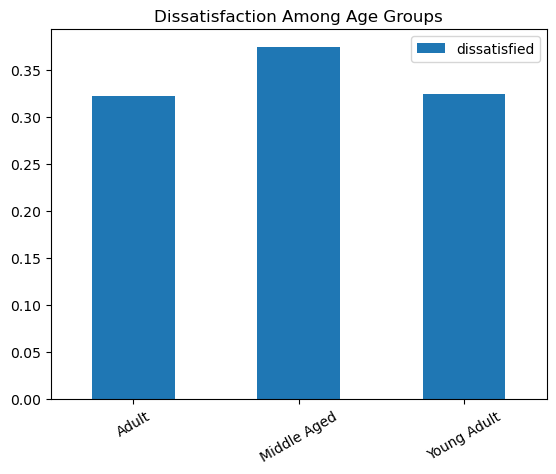

In [47]:
age_group_diss.plot(kind='bar', rot=30, title='Dissatisfaction Among Age Groups', xlabel='')

# Findings

It seems the dissatisfaction levels are distributed rather uniformly across age groups, with middle aged employees having slightly higher dissatisfaction levels than the other two age groups.